# Introduction : #

###  
**                           The objective is to find probable companies which are early adopters of technologies where we can identify them and pitch newly launched products **  

----

### Loading Libraries ###

In [65]:

import pandas as pd
import numpy as np
from sklearn import preprocessing
import random
random.seed(90)
from sklearn.preprocessing import StandardScaler  
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
from sklearn import preprocessing
import random
import pandas as pd
import numpy as np
from sklearn import preprocessing
import random
random.seed(90)
print('Random',random.random())
from sklearn.cross_validation import cross_val_score, train_test_split

Random 0.20367044742105156


### New age Libraries ####

In [66]:

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# Import the 3 dimensionality reduction methods
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

### Data manupulation and cleansing ###

C:\Users\saragada\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Estimated number of clusters: 4


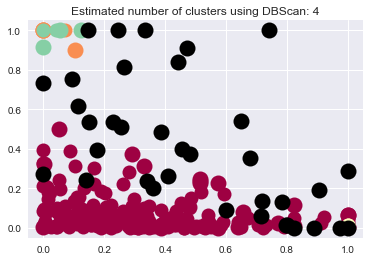

In [67]:

results2=pd.read_csv('C:/Users/saragada/Desktop/HPI/Margin Forecast/Margin_cluster.csv')

result3=results2[(results2['Manufacturing_Product_Product_Type_Identifier'].str.contains('UN')) & (results2['Manufacturing_Product_Identifier'].str.contains('#'))]

result3['Sku Category']='Fully Config'

Old_sku_log=result3.loc[(result3['Revenue_Recognition_Fiscal_Year_Quarter_Display_Code'].str.contains('2017-Q1'))]

Old_sku_log_list=list(Old_sku_log['Manufacturing_Product_Identifier'].unique())

result3=result3.loc[~result3['Manufacturing_Product_Identifier'].isin(Old_sku_log_list)]

Deal_Pivot=pd.pivot_table(result3,values=['Working_PnL_Enterprise_Standard_Cost_USD','Working_PnL_Summary_Net_Revenue_US_Dollar_Amount'],index=['Sold_To_Customer_Name'],aggfunc='sum')
Deal_Pivot=Deal_Pivot.reset_index()

Deal_Pivot['Margin_percentage']=(Deal_Pivot['Working_PnL_Summary_Net_Revenue_US_Dollar_Amount']-abs(Deal_Pivot['Working_PnL_Enterprise_Standard_Cost_USD']))/Deal_Pivot['Working_PnL_Summary_Net_Revenue_US_Dollar_Amount']

Deal_Pivot2=pd.pivot_table(result3,values=['Manufacturing_Product_Identifier'], columns=['Revenue_Recognition_Fiscal_Year_Quarter_Display_Code'],index=['Sold_To_Customer_Name'],aggfunc='count',margins=True)

Deal_Pivot3=Deal_Pivot2.dropna()

Deal_Pivot4=Deal_Pivot3.reset_index()

Deal_Pivot4=Deal_Pivot4[:-1]

#Deal_Pivot4['Sold_To_Customer_Name','2017-Q1-Count']=Deal_Pivot4[('Sold_To_Customer_Name',''),('Manufacturing_Product_Identifier', '2017-Q1  ')]
link_table=pd.DataFrame()
link_table['Sold_To_Customer_Name']=Deal_Pivot4[('Sold_To_Customer_Name','')]

link_table['Earl']=Deal_Pivot4[('Manufacturing_Product_Identifier', '2017-Q2  ')]/Deal_Pivot4[('Manufacturing_Product_Identifier', 'All')]

result = pd.merge(link_table,Deal_Pivot,
                 on='Sold_To_Customer_Name', 
                 how='left')

data=result.dropna()
data2=data
data2 = data2[np.isfinite(data2['Margin_percentage'])]



predictors=data2.columns.drop(['Sold_To_Customer_Name','Working_PnL_Enterprise_Standard_Cost_USD'])

data3=data2[predictors]




down_quantiles = data3.quantile(0.05)
outliers_low = (data3 < down_quantiles)

high_quantiles = data3.quantile(0.95)
outliers_high = (data3 > high_quantiles)

data3=data3.mask(outliers_low, down_quantiles, axis=1)
data3=data3.mask(outliers_high, high_quantiles, axis=1)  
#data3=data3[data3.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
X = np.asarray(data3)




from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler


transformer = MinMaxScaler().fit(X)

X=transformer.transform(X)
db = DBSCAN(eps=0.15, min_samples=5).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)

import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0,0,0,1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=16)

plt.title('Estimated number of clusters using DBScan: %d' % n_clusters_)
plt.show()
labels=list(labels)

## KMeans and ELbow curve to estimate K

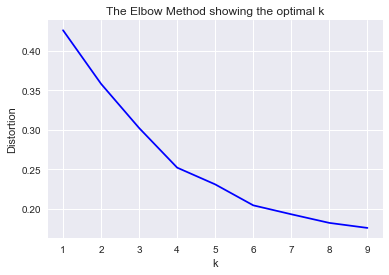

In [68]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
 
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## Silhouette Score estimation to get upto a concrete K

In [69]:

for n_cluster in range(3, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
    
    
kmeans = KMeans(n_clusters=4).fit(X)


kmeanslabel = kmeans.labels_

colors = ['b', 'g', 'r', 'o']

data2['Labels']=kmeanslabel

data2.to_csv('C:/Users/saragada/Desktop/HPI/Margin Forecast/cluster_analysis.csv')

For n_clusters=3, The Silhouette Coefficient is 0.3518877786048994
For n_clusters=4, The Silhouette Coefficient is 0.37511860812773945
For n_clusters=5, The Silhouette Coefficient is 0.35953786136544
For n_clusters=6, The Silhouette Coefficient is 0.3555873953215431
For n_clusters=7, The Silhouette Coefficient is 0.35323557834881464
For n_clusters=8, The Silhouette Coefficient is 0.34516307149919284
For n_clusters=9, The Silhouette Coefficient is 0.3127579305224406
For n_clusters=10, The Silhouette Coefficient is 0.32654388236745807


## KMeans implementation and ploting of clusters

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

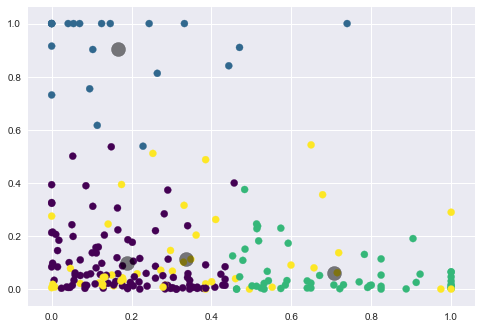

In [71]:
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [72]:
cluster_names = {0: 'Clus_0', 1: 'Clus_1',2: 'Clus_2',3: 'Clus_3'}

In [73]:

cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}

## Cluster repesentation with Titles 

C:\Users\saragada\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix



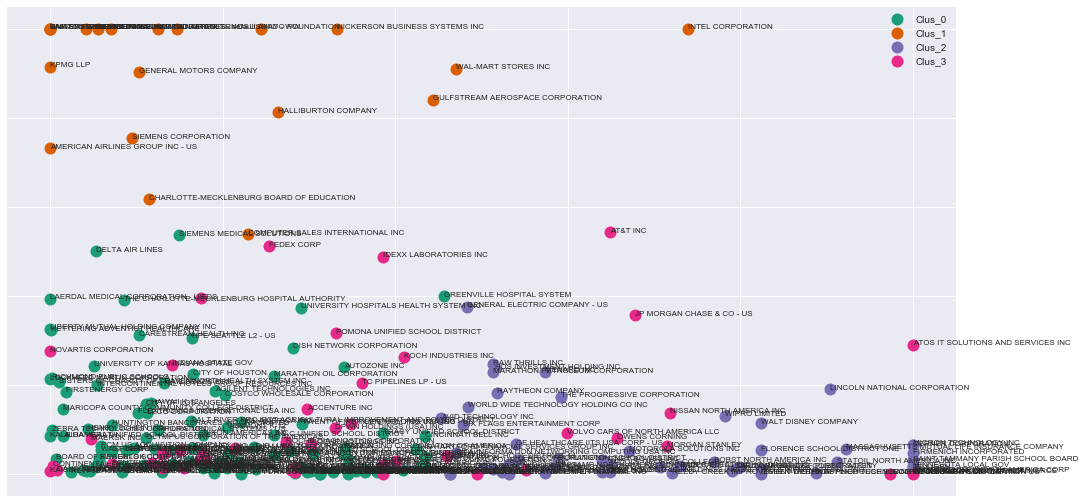

In [74]:
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=X[:, 0], y=X[:, 1], label=kmeanslabel, title=data2['Sold_To_Customer_Name'])) 

#group by cluster


groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=8)  

    
    
plt.show() #show the plot

#uncomment the below to save the plot if need be
#plt.savefig('clusters_small_noaxes.png', dpi=200)

In [75]:
import numpy as np
import pandas as pd
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
import mpld3

In [76]:
#define custom toolbar location
class TopToolbar(mpld3.plugins.PluginBase):
    """Plugin for moving toolbar to top of figure"""

    JAVASCRIPT = """
    mpld3.register_plugin("toptoolbar", TopToolbar);
    TopToolbar.prototype = Object.create(mpld3.Plugin.prototype);
    TopToolbar.prototype.constructor = TopToolbar;
    function TopToolbar(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    TopToolbar.prototype.draw = function(){
      // the toolbar svg doesn't exist
      // yet, so first draw it
      this.fig.toolbar.draw();

      // then change the y position to be
      // at the top of the figure
      this.fig.toolbar.toolbar.attr("x", 150);
      this.fig.toolbar.toolbar.attr("y", 400);

      // then remove the draw function,
      // so that it is not called again
      this.fig.toolbar.draw = function() {}
    }
    """
    def __init__(self):
        self.dict_ = {"type": "toptoolbar"}

## D3 representation of Clusters using mlpd3

In [77]:
df = pd.DataFrame(dict(x=X[:, 0], y=X[:, 1], label=kmeanslabel, title=data2['Sold_To_Customer_Name'])) 

#group by cluster


groups = df.groupby('label')



#define custom css to format the font and to remove the axis labeling
css = """
text.mpld3-text, div.mpld3-tooltip {
  font-family:Arial, Helvetica, sans-serif;
}

g.mpld3-xaxis, g.mpld3-yaxis {
display: none; }

svg.mpld3-figure {
margin-left: -200px;}
"""

# Plot 
fig, ax = plt.subplots(figsize=(13,9)) #set plot size
ax.margins(0.03) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    points = ax.plot(group.x, group.y, marker='o', linestyle='', ms=18, 
                     label=cluster_names[name], mec='none', 
                     color=cluster_colors[name])
    ax.set_aspect('auto')
    labels = [i for i in group.title]
    
    #set tooltip using points, labels and the already defined 'css'
    tooltip = mpld3.plugins.PointHTMLTooltip(points[0], labels,
                                       voffset=10, hoffset=10, css=css)
    #connect tooltip to fig
    mpld3.plugins.connect(fig, tooltip, TopToolbar())    
    
    #set tick marks as blank
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])
    
    #set axis as blank
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

    
ax.legend(numpoints=1) #show legend with only one dot

mpld3.display() #show the plot

#uncomment the below to export to html
#html = mpld3.fig_to_html(fig)
#print(html)(fig)
#print(html)

## Plotly representaion of K Means

In [96]:
trace_Kmeans = go.Scatter(x=X[:, 0], y= X[:, 1], mode="markers",name = cluster_names[name],
                    showlegend=True,
                    marker=dict(
                            size=15,
                            color = y_kmeans,
                            colorscale = 'Portland',
                            showscale=False, 
                            line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        )
                   ),text= data2['Sold_To_Customer_Name'])
layout = dict(title = 'KMeans Clustering',
              hovermode= 'closest',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False),
              showlegend= False
             )

data = [trace_Kmeans]
fig1 = dict(data=data, layout= layout)
# fig1.append_trace(contour_list)
py.iplot(fig1, filename="svm")

In [95]:
data2.head()

,Sold_To_Customer_Name,Earl,Working_PnL_Enterprise_Standard_Cost_USD,Working_PnL_Summary_Net_Revenue_US_Dollar_Amount,Margin_percentage,Labels
0,3M COMPANY,0.040000,-572156.300,653311.00,0.124221,0
1,A B C UNIFIED SCHOOL DISTRICT,0.071429,-827665.720,991157.83,0.164951,0
2,ACCENTURE INC,0.080000,-1583478.180,1641921.52,0.035594,3
3,AGILENT TECHNOLOGIES INC,0.055693,-1770735.539,2084518.12,0.150530,0
4,AKZO NOBEL INC - US,0.048780,-318998.870,367537.00,0.132063,0


## Box Plot for revenue vation across clusters

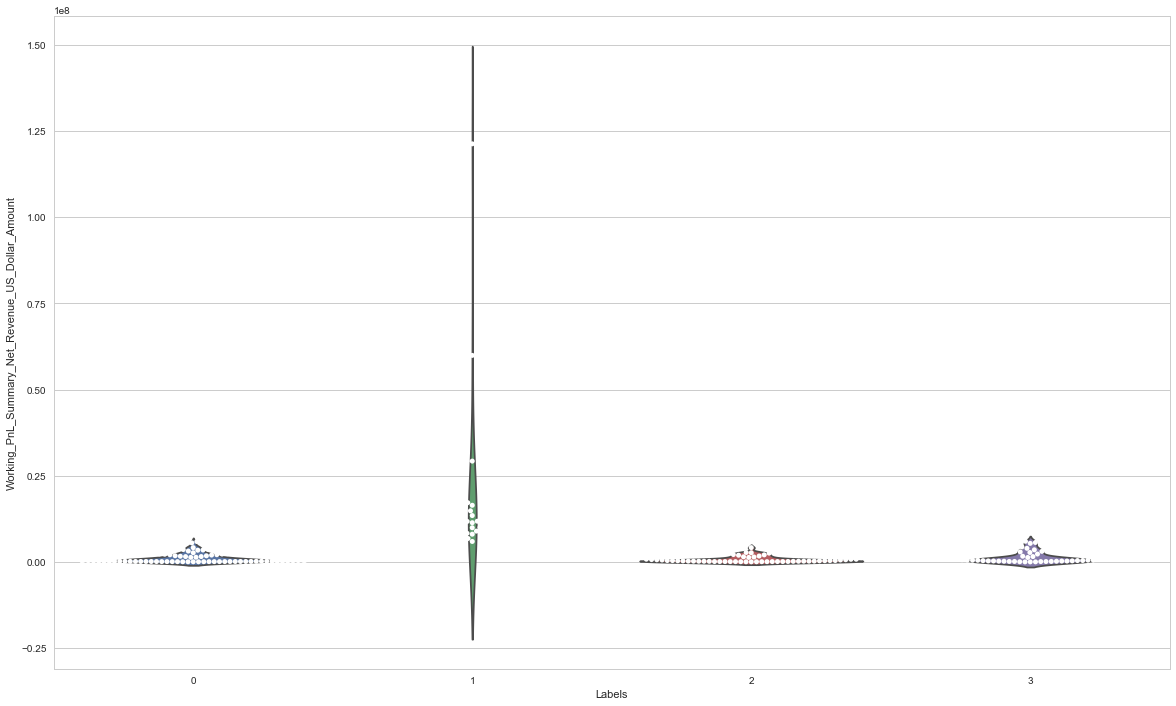

In [86]:
sns.set(style="whitegrid")
fig=plt.gcf()
fig.set_size_inches(20,12)
ax = sns.violinplot(x="Labels", y="Working_PnL_Summary_Net_Revenue_US_Dollar_Amount", data=data2, inner=None)
ax = sns.swarmplot(x="Labels", y="Working_PnL_Summary_Net_Revenue_US_Dollar_Amount", data=data2,color="white", edgecolor="black")

In [98]:
cluster_0=data2[data2['Labels']==0]

In [99]:
cluster_0.describe()

,Earl,Working_PnL_Enterprise_Standard_Cost_USD,Working_PnL_Summary_Net_Revenue_US_Dollar_Amount,Margin_percentage,Labels
count,104.000000,1.040000e+02,1.040000e+02,104.000000,104.0
mean,0.055070,-9.164629e+05,1.122146e+06,0.202483,0.0
std,0.030020,1.061100e+06,1.300896e+06,0.066516,0.0
min,0.009009,-4.626058e+06,3.632443e+04,0.079451,0.0
25%,0.030580,-1.247885e+06,1.861421e+05,0.154722,0.0
50%,0.051316,-5.217592e+05,6.258542e+05,0.200182,0.0
75%,0.078989,-1.459781e+05,1.569131e+06,0.247965,0.0
max,0.116279,-2.580262e+04,5.906116e+06,0.381831,0.0


In [100]:
cluster_1=data2[data2['Labels']==1]
cluster_1.describe()

,Earl,Working_PnL_Enterprise_Standard_Cost_USD,Working_PnL_Summary_Net_Revenue_US_Dollar_Amount,Margin_percentage,Labels
count,104.000000,1.040000e+02,1.040000e+02,104.000000,104.0
mean,0.055070,-9.164629e+05,1.122146e+06,0.202483,0.0
std,0.030020,1.061100e+06,1.300896e+06,0.066516,0.0
min,0.009009,-4.626058e+06,3.632443e+04,0.079451,0.0
25%,0.030580,-1.247885e+06,1.861421e+05,0.154722,0.0
50%,0.051316,-5.217592e+05,6.258542e+05,0.200182,0.0
75%,0.078989,-1.459781e+05,1.569131e+06,0.247965,0.0
max,0.116279,-2.580262e+04,5.906116e+06,0.381831,0.0


In [101]:
cluster_2=data2[data2['Labels']==2]
cluster_2.describe()

,Earl,Working_PnL_Enterprise_Standard_Cost_USD,Working_PnL_Summary_Net_Revenue_US_Dollar_Amount,Margin_percentage,Labels
count,54.000000,5.400000e+01,5.400000e+01,54.000000,54.0
mean,0.186377,-5.912252e+05,7.252803e+05,0.209802,2.0
std,0.070259,7.388484e+05,9.123689e+05,0.101514,0.0
min,0.115385,-3.098382e+06,2.051607e+04,0.006864,2.0
25%,0.132018,-7.107944e+05,1.041553e+05,0.132251,2.0
50%,0.162474,-2.594058e+05,3.132372e+05,0.203554,2.0
75%,0.210714,-8.879696e+04,7.777494e+05,0.260296,2.0
max,0.400000,-1.200523e+04,4.149423e+06,0.423640,2.0


In [102]:
cluster_3=data2[data2['Labels']==3]
cluster_3.describe()

,Earl,Working_PnL_Enterprise_Standard_Cost_USD,Working_PnL_Summary_Net_Revenue_US_Dollar_Amount,Margin_percentage,Labels
count,48.000000,4.800000e+01,4.800000e+01,48.000000,48.0
mean,0.093893,-1.395652e+06,1.280603e+06,-1.913960,3.0
std,0.076498,1.757202e+06,1.605249e+06,8.362024,0.0
min,0.009709,-6.741944e+06,7.700000e+02,-44.395104,3.0
25%,0.045995,-1.616731e+06,2.388642e+05,-0.089608,3.0
50%,0.076923,-5.879607e+05,5.407553e+05,-0.021451,3.0
75%,0.108560,-2.655841e+05,1.571512e+06,0.019537,3.0
max,0.409091,-2.113648e+04,5.984870e+06,0.089645,3.0
